## TASK 4 - Face Mask Detection using Convolutional Neural Networks

Group Number: #INSERT HERE


In [1]:
%load_ext autoreload
%autoreload 1
%aimport my_model, utils, my_datamodule, my_model, my_trainer
%matplotlib inline
import os

import numpy as np
import torch
from torchinfo import summary

import my_datamodule
import my_model
import my_trainer
import utils

torch.manual_seed(30)
np.random.seed(30)

if not os.path.exists(os.path.join(os.getcwd(), 'results')):
    os.makedirs(os.path.join(os.getcwd(), 'results'))

# Check GPU connection
gpu_active = torch.cuda.is_available()
print("GPU is used" if gpu_active else "CPU is used")


CPU is used


### 1. Data import and Preparation

In TASK3 we used a common computer vision processing step for classification problems in computer vision - manual feature extraction. This time we want to use a learning approach which does not need handcrafted inputs. 

Implement the **get_transforms** method. Make sure it returns a transformation that maps input images to tensor values and resizes them to a square image.

For simplicity and actuality you will detect if a person wears a face mask or not. Follow the instructions in the assignment description. Implement the get_transform method of **my_datamodule.DataModule** and create an instance of **DataModule**. Use an image size of 64 and a batch_size around **64**. Depending on your processor you can increase the amount of threads that load data with the parameter **num_worker**. For example use **num_workers=4** to start four worker threads for data loading and preprocessing. 

In [2]:
data_module_simple = my_datamodule.DataModule(img_size=64, batch_size=64)

### 2. Simple Face Mask Detection CNN
#### 2.1 Network Structure

This section will familiarize you with the steps of creating a deep artificial neural network from scratch. Implement the **__init__** and **forward** methods of **my_model.MaskClassifier** according to the instructions.

Create a simple classification model using ***model=my_model.MaskClassifier(..)***. Set the image size to **64** (the dataset will be proccessed to squared images) and drop out value to **0**.

Take a look at the structure of your model by calling ***summary(model, (32, 3, img_size, img_size))***

In [3]:
model_simple = my_model.MaskClassifier(name="mask_classifier_simple", img_size=64)
summary(model_simple, (32, 3, 64, 64))

Layer (type:depth-idx)                   Output Shape              Param #
MaskClassifier                           [32, 1]                   --
├─Conv2d: 1-1                            [32, 32, 62, 62]          896
├─MaxPool2d: 1-2                         [32, 32, 31, 31]          --
├─Conv2d: 1-3                            [32, 32, 29, 29]          9,248
├─MaxPool2d: 1-4                         [32, 32, 14, 14]          --
├─Linear: 1-5                            [32, 1]                   6,273
Total params: 16,417
Trainable params: 16,417
Non-trainable params: 0
Total mult-adds (M): 359.30
Input size (MB): 1.57
Forward/backward pass size (MB): 38.38
Params size (MB): 0.07
Estimated Total Size (MB): 40.02

***
#### Q1: Take a look at the structure of the MaskClassifier CNN. What does the column 'Output Shape' represent? What does the column Param represent? Why is the shape decreasing? Finally, explain why the last layer has length 1. 

- OutputShape = Shape of the layers output (thus next layers input)
- Param = Number of trainable parameters in layer
- Shape is decreasing to finally 1 because we want to make a binary decision (mask or no mask in image)

#### 2.2 Training 

In this step you will train the model with the training and validation data set iterator. The **my_trainer** module provides functionality for training and logging the learning progress.

First create a trainer instance using my_trainer.Trainer(...) and pass the previosuly created model and datamodule to it. If you have a device that supports cuda you can pass **gpu=True** to speed up training. Use trainer.fit(...) to start the training process. Depending on wether you use a GPU or CPU and the number of epochs, the training can take a while. Start with a learning rate of **0.0001** and **50** epochs. The loss should decrease and the accuracy on the validation should increase. The weights of the best model are saved in separate files in your results directory automatically.

In [4]:
trainer_simple = my_trainer.Trainer(model_simple, data_module_simple)

# Comment out trainer.load_model and uncomment trainer.fit to retrain model
#trainer_simple.load_model()
trainer_simple.fit(epochs=50, lr=0.0001)

Epoch 0: 100%|██████████████████████████████████| 42/42 [00:13<00:00,  3.03it/s]


Epoch 0 Training: Loss: 0.6697448492050171 Accuracy: 0.685353696346283
Epoch 0 Validation: Loss: 0.6341766119003296 Accuracy: 0.7512152791023254


Epoch 1: 100%|██████████████████████████████████| 42/42 [00:13<00:00,  3.06it/s]


Epoch 1 Training: Loss: 0.5866970419883728 Accuracy: 0.8121851682662964
Epoch 1 Validation: Loss: 0.5255240797996521 Accuracy: 0.820225715637207


Epoch 2: 100%|██████████████████████████████████| 42/42 [00:13<00:00,  3.01it/s]


Epoch 2 Training: Loss: 0.4630330801010132 Accuracy: 0.8615785241127014
Epoch 2 Validation: Loss: 0.39604488015174866 Accuracy: 0.8531250357627869


Epoch 3: 100%|██████████████████████████████████| 42/42 [00:13<00:00,  3.00it/s]


Epoch 3 Training: Loss: 0.3565942645072937 Accuracy: 0.8836709856987
Epoch 3 Validation: Loss: 0.3226245939731598 Accuracy: 0.8888888955116272


Epoch 4: 100%|██████████████████████████████████| 42/42 [00:13<00:00,  3.02it/s]


Epoch 4 Training: Loss: 0.30519741773605347 Accuracy: 0.8942593932151794
Epoch 4 Validation: Loss: 0.2933160066604614 Accuracy: 0.8929687142372131


Epoch 5: 100%|██████████████████████████████████| 42/42 [00:13<00:00,  3.04it/s]


Epoch 5 Training: Loss: 0.27556905150413513 Accuracy: 0.9047046899795532
Epoch 5 Validation: Loss: 0.2581859529018402 Accuracy: 0.9072916507720947


Epoch 6: 100%|██████████████████████████████████| 42/42 [00:14<00:00,  2.97it/s]


Epoch 6 Training: Loss: 0.25870999693870544 Accuracy: 0.9094551801681519
Epoch 6 Validation: Loss: 0.23602710664272308 Accuracy: 0.9201388955116272


Epoch 7: 100%|██████████████████████████████████| 42/42 [00:13<00:00,  3.09it/s]


Epoch 7 Training: Loss: 0.24806740880012512 Accuracy: 0.911401093006134
Epoch 7 Validation: Loss: 0.2237284630537033 Accuracy: 0.9240451455116272


Epoch 8: 100%|██████████████████████████████████| 42/42 [00:13<00:00,  3.09it/s]


Epoch 8 Training: Loss: 0.2374039590358734 Accuracy: 0.917439341545105
Epoch 8 Validation: Loss: 0.21794404089450836 Accuracy: 0.9309027791023254


Epoch 9: 100%|██████████████████████████████████| 42/42 [00:13<00:00,  3.07it/s]


Epoch 9 Training: Loss: 0.23530137538909912 Accuracy: 0.9191277623176575
Epoch 9 Validation: Loss: 0.21517355740070343 Accuracy: 0.9348090291023254


Epoch 10: 100%|█████████████████████████████████| 42/42 [00:13<00:00,  3.02it/s]


Epoch 10 Training: Loss: 0.22782368957996368 Accuracy: 0.9187271595001221
Epoch 10 Validation: Loss: 0.21048592031002045 Accuracy: 0.9348090291023254


Epoch 11: 100%|█████████████████████████████████| 42/42 [00:13<00:00,  3.03it/s]


Epoch 11 Training: Loss: 0.22590425610542297 Accuracy: 0.9214457273483276
Epoch 11 Validation: Loss: 0.20554596185684204 Accuracy: 0.9348090291023254


Epoch 12: 100%|█████████████████████████████████| 42/42 [00:13<00:00,  3.07it/s]


Epoch 12 Training: Loss: 0.21807861328125 Accuracy: 0.9254235625267029
Epoch 12 Validation: Loss: 0.1945119947195053 Accuracy: 0.9306423664093018


Epoch 13: 100%|█████████████████████████████████| 42/42 [00:13<00:00,  3.02it/s]


Epoch 13 Training: Loss: 0.21588902175426483 Accuracy: 0.9230197072029114
Epoch 13 Validation: Loss: 0.1901845932006836 Accuracy: 0.9360242486000061


Epoch 14: 100%|█████████████████████████████████| 42/42 [00:14<00:00,  2.99it/s]


Epoch 14 Training: Loss: 0.21277287602424622 Accuracy: 0.9259100556373596
Epoch 14 Validation: Loss: 0.19092325866222382 Accuracy: 0.9387152791023254


Epoch 15: 100%|█████████████████████████████████| 42/42 [00:14<00:00,  2.97it/s]


Epoch 15 Training: Loss: 0.21071745455265045 Accuracy: 0.926453709602356
Epoch 15 Validation: Loss: 0.18708445131778717 Accuracy: 0.9279513955116272


Epoch 16: 100%|█████████████████████████████████| 42/42 [00:15<00:00,  2.73it/s]


Epoch 16 Training: Loss: 0.2092077136039734 Accuracy: 0.9266541004180908
Epoch 16 Validation: Loss: 0.1805950403213501 Accuracy: 0.9386284351348877


Epoch 17: 100%|█████████████████████████████████| 42/42 [00:14<00:00,  3.00it/s]


Epoch 17 Training: Loss: 0.20562943816184998 Accuracy: 0.9254521727561951
Epoch 17 Validation: Loss: 0.17924684286117554 Accuracy: 0.9438367486000061


Epoch 18: 100%|█████████████████████████████████| 42/42 [00:14<00:00,  2.99it/s]


Epoch 18 Training: Loss: 0.20096853375434875 Accuracy: 0.9288862347602844
Epoch 18 Validation: Loss: 0.17594002187252045 Accuracy: 0.9425346851348877


Epoch 19: 100%|█████████████████████████████████| 42/42 [00:14<00:00,  2.92it/s]


Epoch 19 Training: Loss: 0.2011370211839676 Accuracy: 0.928600013256073
Epoch 19 Validation: Loss: 0.17605261504650116 Accuracy: 0.9438367486000061


Epoch 20: 100%|█████████████████████████████████| 42/42 [00:13<00:00,  3.02it/s]


Epoch 20 Training: Loss: 0.19591206312179565 Accuracy: 0.9276556968688965
Epoch 20 Validation: Loss: 0.17281688749790192 Accuracy: 0.9451388716697693


Epoch 21: 100%|█████████████████████████████████| 42/42 [00:13<00:00,  3.03it/s]


Epoch 21 Training: Loss: 0.19436593353748322 Accuracy: 0.9261103272438049
Epoch 21 Validation: Loss: 0.16972829401493073 Accuracy: 0.9412326216697693


Epoch 22: 100%|█████████████████████████████████| 42/42 [00:13<00:00,  3.05it/s]


Epoch 22 Training: Loss: 0.19106172025203705 Accuracy: 0.9295158386230469
Epoch 22 Validation: Loss: 0.17394132912158966 Accuracy: 0.9465277791023254


Epoch 23: 100%|█████████████████████████████████| 42/42 [00:13<00:00,  3.06it/s]


Epoch 23 Training: Loss: 0.18864451348781586 Accuracy: 0.9292868375778198
Epoch 23 Validation: Loss: 0.16806431114673615 Accuracy: 0.949131965637207


Epoch 24: 100%|█████████████████████████████████| 42/42 [00:14<00:00,  2.93it/s]


Epoch 24 Training: Loss: 0.18792149424552917 Accuracy: 0.9304601550102234
Epoch 24 Validation: Loss: 0.17159312963485718 Accuracy: 0.9439236521720886


Epoch 25: 100%|█████████████████████████████████| 42/42 [00:14<00:00,  2.98it/s]


Epoch 25 Training: Loss: 0.18778175115585327 Accuracy: 0.9309180378913879
Epoch 25 Validation: Loss: 0.16621822118759155 Accuracy: 0.9465277791023254


Epoch 26: 100%|█████████████████████████████████| 42/42 [00:13<00:00,  3.10it/s]


Epoch 26 Training: Loss: 0.18323124945163727 Accuracy: 0.9332360625267029
Epoch 26 Validation: Loss: 0.16054747998714447 Accuracy: 0.9464409351348877


Epoch 27: 100%|█████████████████████████████████| 42/42 [00:14<00:00,  2.94it/s]


Epoch 27 Training: Loss: 0.1823231428861618 Accuracy: 0.9337225556373596
Epoch 27 Validation: Loss: 0.1598988175392151 Accuracy: 0.9465277791023254


Epoch 28: 100%|█████████████████████████████████| 42/42 [00:14<00:00,  2.91it/s]


Epoch 28 Training: Loss: 0.18118242919445038 Accuracy: 0.9325206279754639
Epoch 28 Validation: Loss: 0.1599866896867752 Accuracy: 0.9465277791023254


Epoch 29: 100%|█████████████████████████████████| 42/42 [00:13<00:00,  3.01it/s]


Epoch 29 Training: Loss: 0.17803004384040833 Accuracy: 0.9335221648216248
Epoch 29 Validation: Loss: 0.1566578894853592 Accuracy: 0.9411458373069763


Epoch 30: 100%|█████████████████████████████████| 42/42 [00:14<00:00,  2.90it/s]


Epoch 30 Training: Loss: 0.175975501537323 Accuracy: 0.9358402490615845
Epoch 30 Validation: Loss: 0.1561579555273056 Accuracy: 0.9465277791023254


Epoch 31: 100%|█████████████████████████████████| 42/42 [00:13<00:00,  3.09it/s]


Epoch 31 Training: Loss: 0.1727599799633026 Accuracy: 0.9356684684753418
Epoch 31 Validation: Loss: 0.15724219381809235 Accuracy: 0.9465277791023254


Epoch 32: 100%|█████████████████████████████████| 42/42 [00:13<00:00,  3.00it/s]


Epoch 32 Training: Loss: 0.17179398238658905 Accuracy: 0.9350102543830872
Epoch 32 Validation: Loss: 0.15341901779174805 Accuracy: 0.9478299021720886


Epoch 33: 100%|█████████████████████████████████| 42/42 [00:13<00:00,  3.08it/s]


Epoch 33 Training: Loss: 0.17149436473846436 Accuracy: 0.9332360625267029
Epoch 33 Validation: Loss: 0.15101435780525208 Accuracy: 0.9438367486000061


Epoch 34: 100%|█████████████████████████████████| 42/42 [00:13<00:00,  3.07it/s]


Epoch 34 Training: Loss: 0.16943129897117615 Accuracy: 0.935697078704834
Epoch 34 Validation: Loss: 0.15555883944034576 Accuracy: 0.9426215291023254


Epoch 35: 100%|█████████████████████████████████| 42/42 [00:13<00:00,  3.01it/s]


Epoch 35 Training: Loss: 0.16542309522628784 Accuracy: 0.9384444355964661
Epoch 35 Validation: Loss: 0.16850243508815765 Accuracy: 0.9439236521720886


Epoch 36: 100%|█████████████████████████████████| 42/42 [00:13<00:00,  3.06it/s]


Epoch 36 Training: Loss: 0.16548261046409607 Accuracy: 0.9353823065757751
Epoch 36 Validation: Loss: 0.14818812906742096 Accuracy: 0.9438367486000061


Epoch 37: 100%|█████████████████████████████████| 42/42 [00:14<00:00,  2.98it/s]


Epoch 37 Training: Loss: 0.16329583525657654 Accuracy: 0.9381582140922546
Epoch 37 Validation: Loss: 0.15628843009471893 Accuracy: 0.9439236521720886


Epoch 38: 100%|█████████████████████████████████| 42/42 [00:13<00:00,  3.01it/s]


Epoch 38 Training: Loss: 0.15998432040214539 Accuracy: 0.9417926073074341
Epoch 38 Validation: Loss: 0.14568713307380676 Accuracy: 0.9477429986000061


Epoch 39: 100%|█████████████████████████████████| 42/42 [00:14<00:00,  2.95it/s]


Epoch 39 Training: Loss: 0.16000112891197205 Accuracy: 0.9387305378913879
Epoch 39 Validation: Loss: 0.1507960557937622 Accuracy: 0.9465277791023254


Epoch 40: 100%|█████████████████████████████████| 42/42 [00:14<00:00,  2.99it/s]


Epoch 40 Training: Loss: 0.1591188907623291 Accuracy: 0.9423649311065674
Epoch 40 Validation: Loss: 0.1573125571012497 Accuracy: 0.9426215291023254


Epoch 41: 100%|█████████████████████████████████| 42/42 [00:14<00:00,  2.88it/s]


Epoch 41 Training: Loss: 0.15710069239139557 Accuracy: 0.9381582140922546
Epoch 41 Validation: Loss: 0.14483164250850677 Accuracy: 0.9477429986000061


Epoch 42: 100%|█████████████████████████████████| 42/42 [00:14<00:00,  2.88it/s]


Epoch 42 Training: Loss: 0.1560383290052414 Accuracy: 0.9415350556373596
Epoch 42 Validation: Loss: 0.14427550137043 Accuracy: 0.9477429986000061


Epoch 43: 100%|█████████████████████████████████| 42/42 [00:14<00:00,  2.98it/s]


Epoch 43 Training: Loss: 0.15941010415554047 Accuracy: 0.9401327967643738
Epoch 43 Validation: Loss: 0.14271406829357147 Accuracy: 0.9475694298744202


Epoch 44: 100%|█████████████████████████████████| 42/42 [00:14<00:00,  2.95it/s]


Epoch 44 Training: Loss: 0.1551670879125595 Accuracy: 0.9411343932151794
Epoch 44 Validation: Loss: 0.16076287627220154 Accuracy: 0.9439236521720886


Epoch 45: 100%|█████████████████████████████████| 42/42 [00:14<00:00,  2.94it/s]


Epoch 45 Training: Loss: 0.1524139642715454 Accuracy: 0.942078709602356
Epoch 45 Validation: Loss: 0.14082974195480347 Accuracy: 0.9516492486000061


Epoch 46: 100%|█████████████████████████████████| 42/42 [00:26<00:00,  1.61it/s]


Epoch 46 Training: Loss: 0.15097081661224365 Accuracy: 0.9450548887252808
Epoch 46 Validation: Loss: 0.14063630998134613 Accuracy: 0.9448785185813904


Epoch 47: 100%|█████████████████████████████████| 42/42 [00:14<00:00,  2.89it/s]


Epoch 47 Training: Loss: 0.1531466245651245 Accuracy: 0.9411630034446716
Epoch 47 Validation: Loss: 0.14065058529376984 Accuracy: 0.9464409351348877


Epoch 48: 100%|█████████████████████████████████| 42/42 [00:14<00:00,  2.90it/s]


Epoch 48 Training: Loss: 0.14530518651008606 Accuracy: 0.9452266693115234
Epoch 48 Validation: Loss: 0.1609208732843399 Accuracy: 0.9466145634651184


Epoch 49: 100%|█████████████████████████████████| 42/42 [00:14<00:00,  2.96it/s]


Epoch 49 Training: Loss: 0.15053799748420715 Accuracy: 0.9403045177459717
Epoch 49 Validation: Loss: 0.13832245767116547 Accuracy: 0.9542534351348877


#### 1.3 Performance Evaluation 

Test the model with **trainer.test()** and plot the model performance of the last training session with ***plot_performance(..)***.

***Submission:*** Save the output of ***trainer.plot_performance(..)*** as **task4_model_simple.png**

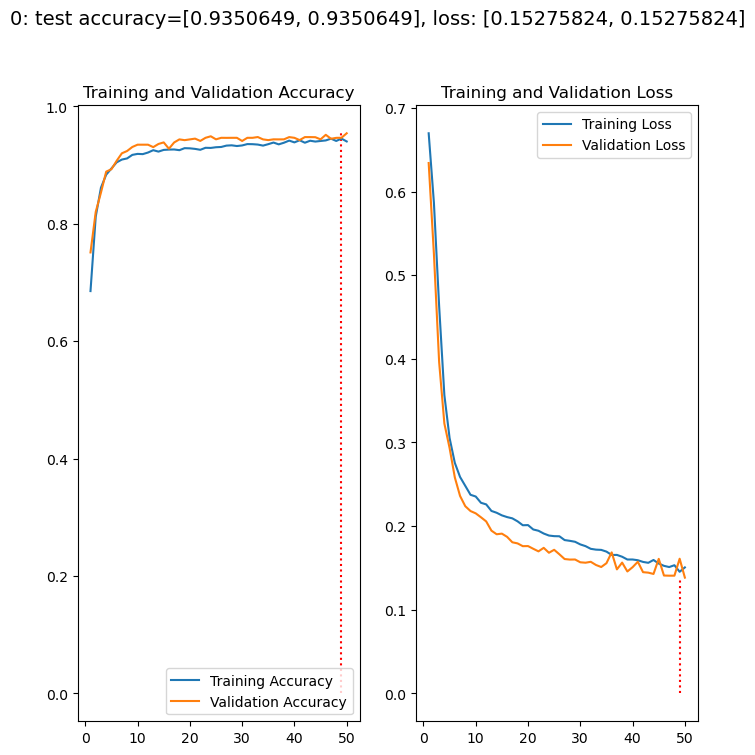

In [5]:
loss_simple, acc_simple = trainer_simple.test()
# Uncomment trainer.plot_performance only if model was fully trained in current notebook-session
# because old plot is lost otherwise (because model.history isn't persisted across notebook sessions)
trainer_simple.plot_performance("task4_model_simple.png", group_no=2)

***
#### Q2: What values are optimized during the training process of a CNN? Why isn't the validation accuracy increasing after some time? Why do we use a validation dataset?

- Params (weights/biases) in conv-layers are optimized to minimize loss (according to specified Adam/BCELoss)
- Because after some epoch the params of the network converge to a local optimum (thus we approach a "constant configuration of params" (and thus loss/accuracy)). You could adjust the learning rate to change the behavior.
- We use a validation set of data that the network has not yet seen to make sure that the network did not overfit to the training data.

### 3 Regularization
#### 3.1 Network Structure

With the basic model you should have achieved a test accuracy of about 95% As you can see on the last model performance, the simple model starts to overfit on the training data. One option to improve generalization is to use regularization. You can add batch normalization and dropout to do so. Update the **MaskClassifier** to include those techniques. Add dropout and batch normalization before suitable layers. Use the dropout parameter passed to the constructor for the dropout rate.

Create a new model with a dropout rate of **dropout=0.5** or **batch_norm=True** and name it **'model_regularized'**. Take a look at the structure of your model by calling ***summary(model2)***. 


In [7]:
model_regularized = my_model.MaskClassifier(name="mask_classifier_regularized", img_size=64, dropout=0.5, batch_norm=True)
summary(model_regularized)

Layer (type:depth-idx)                   Param #
MaskClassifier                           --
├─Conv2d: 1-1                            896
├─MaxPool2d: 1-2                         --
├─Conv2d: 1-3                            9,248
├─MaxPool2d: 1-4                         --
├─Linear: 1-5                            6,273
├─BatchNorm2d: 1-6                       64
├─BatchNorm2d: 1-7                       64
├─Dropout: 1-8                           --
Total params: 16,545
Trainable params: 16,545
Non-trainable params: 0

***
#### Q3: Compare the network structure of the model with and without regularization. What will be the effect of the dropout rate you have chosen? What is the effect of batch normalization?

- Dropout: Deactivates neurons randomly during training to prevent overfitting. 
- BatchNorm: Normalizes each value over the batch-dimension to make training more stable and faster (reduce covariant shift).

#### 3.2 Training the network

Create a new Trainer object called **trainer2**.
Train the second network, using the same learning rate you used for the first model and set the number of epochs around **50**. 
You can use the same Data Module as for the simple model.


In [9]:
trainer_regularized = my_trainer.Trainer(model_regularized, data_module_simple)

# Comment out trainer.load_model and uncomment trainer.fit to retrain model
#trainer_regularized.load_model()
trainer_regularized.fit(epochs=50, lr=0.0001)

Epoch 0: 100%|██████████████████████████████████| 42/42 [00:14<00:00,  2.86it/s]


Epoch 0 Training: Loss: 0.4729609191417694 Accuracy: 0.7809065580368042
Epoch 0 Validation: Loss: 0.3677847683429718 Accuracy: 0.8856770992279053


Epoch 1: 100%|██████████████████████████████████| 42/42 [00:14<00:00,  2.90it/s]


Epoch 1 Training: Loss: 0.27338165044784546 Accuracy: 0.9015281200408936
Epoch 1 Validation: Loss: 0.25144851207733154 Accuracy: 0.9152777791023254


Epoch 2: 100%|██████████████████████████████████| 42/42 [00:14<00:00,  2.85it/s]


Epoch 2 Training: Loss: 0.23751531541347504 Accuracy: 0.9132612347602844
Epoch 2 Validation: Loss: 0.2019176483154297 Accuracy: 0.9347221851348877


Epoch 3: 100%|██████████████████████████████████| 42/42 [00:14<00:00,  2.82it/s]


Epoch 3 Training: Loss: 0.21228404343128204 Accuracy: 0.9254521727561951
Epoch 3 Validation: Loss: 0.1841650754213333 Accuracy: 0.9386284351348877


Epoch 4: 100%|██████████████████████████████████| 42/42 [00:13<00:00,  3.09it/s]


Epoch 4 Training: Loss: 0.18992048501968384 Accuracy: 0.934838593006134
Epoch 4 Validation: Loss: 0.17135031521320343 Accuracy: 0.9438367486000061


Epoch 5: 100%|██████████████████████████████████| 42/42 [00:13<00:00,  3.01it/s]


Epoch 5 Training: Loss: 0.17870844900608063 Accuracy: 0.9328926801681519
Epoch 5 Validation: Loss: 0.1697995662689209 Accuracy: 0.9439236521720886


Epoch 6: 100%|██████████████████████████████████| 42/42 [00:14<00:00,  2.94it/s]


Epoch 6 Training: Loss: 0.16670042276382446 Accuracy: 0.9396749138832092
Epoch 6 Validation: Loss: 0.1630009561777115 Accuracy: 0.9478299021720886


Epoch 7: 100%|██████████████████████████████████| 42/42 [00:13<00:00,  3.01it/s]


Epoch 7 Training: Loss: 0.15358218550682068 Accuracy: 0.9449690580368042
Epoch 7 Validation: Loss: 0.1620343178510666 Accuracy: 0.949131965637207


Epoch 8: 100%|██████████████████████████████████| 42/42 [00:13<00:00,  3.09it/s]


Epoch 8 Training: Loss: 0.1542026549577713 Accuracy: 0.9453411102294922
Epoch 8 Validation: Loss: 0.1439487338066101 Accuracy: 0.9529513716697693


Epoch 9: 100%|██████████████████████████████████| 42/42 [00:13<00:00,  3.02it/s]


Epoch 9 Training: Loss: 0.13637448847293854 Accuracy: 0.9530391693115234
Epoch 9 Validation: Loss: 0.14282666146755219 Accuracy: 0.9595486521720886


Epoch 10: 100%|█████████████████████████████████| 42/42 [00:13<00:00,  3.04it/s]


Epoch 10 Training: Loss: 0.1351916491985321 Accuracy: 0.9560153484344482
Epoch 10 Validation: Loss: 0.14442412555217743 Accuracy: 0.9543402791023254


Epoch 11: 100%|█████████████████████████████████| 42/42 [00:13<00:00,  3.04it/s]


Epoch 11 Training: Loss: 0.12724655866622925 Accuracy: 0.956129789352417
Epoch 11 Validation: Loss: 0.14191468060016632 Accuracy: 0.9556424021720886


Epoch 12: 100%|█████████████████████████████████| 42/42 [00:52<00:00,  1.26s/it]


Epoch 12 Training: Loss: 0.12252315878868103 Accuracy: 0.9587339758872986
Epoch 12 Validation: Loss: 0.13297058641910553 Accuracy: 0.9621527791023254


Epoch 13: 100%|█████████████████████████████████| 42/42 [00:14<00:00,  2.90it/s]


Epoch 13 Training: Loss: 0.1178472489118576 Accuracy: 0.9566735625267029
Epoch 13 Validation: Loss: 0.13240602612495422 Accuracy: 0.960850715637207


Epoch 14: 100%|█████████████████████████████████| 42/42 [05:09<00:00,  7.36s/it]


Epoch 14 Training: Loss: 0.1086890697479248 Accuracy: 0.9608516693115234
Epoch 14 Validation: Loss: 0.13349862396717072 Accuracy: 0.960850715637207


Epoch 15: 100%|█████████████████████████████████| 42/42 [01:08<00:00,  1.62s/it]


Epoch 15 Training: Loss: 0.109275683760643 Accuracy: 0.9610519409179688
Epoch 15 Validation: Loss: 0.12944139540195465 Accuracy: 0.9634549021720886


Epoch 16: 100%|█████████████████████████████████| 42/42 [00:59<00:00,  1.42s/it]


Epoch 16 Training: Loss: 0.10340696573257446 Accuracy: 0.9672905206680298
Epoch 16 Validation: Loss: 0.1261311024427414 Accuracy: 0.964756965637207


Epoch 17: 100%|█████████████████████████████████| 42/42 [18:22<00:00, 26.25s/it]


Epoch 17 Training: Loss: 0.10025695711374283 Accuracy: 0.967176079750061
Epoch 17 Validation: Loss: 0.1290920525789261 Accuracy: 0.960850715637207


Epoch 18: 100%|█████████████████████████████████| 42/42 [01:01<00:00,  1.46s/it]


Epoch 18 Training: Loss: 0.09512974321842194 Accuracy: 0.9694082140922546
Epoch 18 Validation: Loss: 0.1225125789642334 Accuracy: 0.9660590291023254


Epoch 19: 100%|█████████████████████████████████| 42/42 [00:14<00:00,  2.93it/s]


Epoch 19 Training: Loss: 0.090175561606884 Accuracy: 0.9725846648216248
Epoch 19 Validation: Loss: 0.1277533322572708 Accuracy: 0.9595486521720886


Epoch 20: 100%|█████████████████████████████████| 42/42 [00:14<00:00,  2.94it/s]


Epoch 20 Training: Loss: 0.08921876549720764 Accuracy: 0.9694082140922546
Epoch 20 Validation: Loss: 0.11660579591989517 Accuracy: 0.9673611521720886


Epoch 21: 100%|█████████████████████████████████| 42/42 [00:14<00:00,  2.99it/s]


Epoch 21 Training: Loss: 0.08520156145095825 Accuracy: 0.970896303653717
Epoch 21 Validation: Loss: 0.12102442234754562 Accuracy: 0.9621527791023254


Epoch 22: 100%|█████████████████████████████████| 42/42 [00:14<00:00,  2.94it/s]


Epoch 22 Training: Loss: 0.08115445822477341 Accuracy: 0.9745306968688965
Epoch 22 Validation: Loss: 0.12366780638694763 Accuracy: 0.960850715637207


Epoch 23: 100%|█████████████████████████████████| 42/42 [00:14<00:00,  2.96it/s]


Epoch 23 Training: Loss: 0.08007339388132095 Accuracy: 0.9732142686843872
Epoch 23 Validation: Loss: 0.11297517269849777 Accuracy: 0.9673611521720886


Epoch 24: 100%|█████████████████████████████████| 42/42 [00:14<00:00,  2.91it/s]


Epoch 24 Training: Loss: 0.07361942529678345 Accuracy: 0.9761046171188354
Epoch 24 Validation: Loss: 0.11857522279024124 Accuracy: 0.964756965637207


Epoch 25: 100%|█████████████████████████████████| 42/42 [00:13<00:00,  3.02it/s]


Epoch 25 Training: Loss: 0.07520655542612076 Accuracy: 0.9745306968688965
Epoch 25 Validation: Loss: 0.12361005693674088 Accuracy: 0.9582465291023254


Epoch 26: 100%|█████████████████████████████████| 42/42 [00:14<00:00,  2.99it/s]


Epoch 26 Training: Loss: 0.07420151680707932 Accuracy: 0.9742445349693298
Epoch 26 Validation: Loss: 0.12081387639045715 Accuracy: 0.9621527791023254


Epoch 27: 100%|█████████████████████████████████| 42/42 [00:14<00:00,  2.92it/s]


Epoch 27 Training: Loss: 0.06503263115882874 Accuracy: 0.9810267686843872
Epoch 27 Validation: Loss: 0.11103367805480957 Accuracy: 0.9673611521720886


Epoch 28: 100%|█████████████████████████████████| 42/42 [00:14<00:00,  2.91it/s]


Epoch 28 Training: Loss: 0.06689795106649399 Accuracy: 0.9775069355964661
Epoch 28 Validation: Loss: 0.11330574750900269 Accuracy: 0.9660590291023254


Epoch 29: 100%|█████████████████████████████████| 42/42 [07:23<00:00, 10.56s/it]


Epoch 29 Training: Loss: 0.0668211355805397 Accuracy: 0.9782509803771973
Epoch 29 Validation: Loss: 0.12079102545976639 Accuracy: 0.9621527791023254


Epoch 30: 100%|█████████████████████████████████| 42/42 [13:34<00:00, 19.39s/it]


Epoch 30 Training: Loss: 0.06476534157991409 Accuracy: 0.9798249006271362
Epoch 30 Validation: Loss: 0.12171978503465652 Accuracy: 0.960850715637207


Epoch 31: 100%|█████████████████████████████████| 42/42 [00:25<00:00,  1.64it/s]


Epoch 31 Training: Loss: 0.05955050513148308 Accuracy: 0.9801968932151794
Epoch 31 Validation: Loss: 0.11466044187545776 Accuracy: 0.9673611521720886


Epoch 32: 100%|█████████████████████████████████| 42/42 [00:55<00:00,  1.33s/it]


Epoch 32 Training: Loss: 0.057070158421993256 Accuracy: 0.9805689454078674
Epoch 32 Validation: Loss: 0.12168905884027481 Accuracy: 0.956944465637207


Epoch 33: 100%|█████████████████████████████████| 42/42 [01:14<00:00,  1.77s/it]


Epoch 33 Training: Loss: 0.05936325341463089 Accuracy: 0.9798249006271362
Epoch 33 Validation: Loss: 0.1095244288444519 Accuracy: 0.9660590291023254


Epoch 34: 100%|█████████████████████████████████| 42/42 [18:37<00:00, 26.61s/it]


Epoch 34 Training: Loss: 0.060768596827983856 Accuracy: 0.9780505895614624
Epoch 34 Validation: Loss: 0.10819393396377563 Accuracy: 0.964756965637207


Epoch 35: 100%|█████████████████████████████████| 42/42 [00:17<00:00,  2.37it/s]


Epoch 35 Training: Loss: 0.05269762873649597 Accuracy: 0.9842891693115234
Epoch 35 Validation: Loss: 0.11448013037443161 Accuracy: 0.960850715637207


Epoch 36: 100%|█████████████████████████████████| 42/42 [00:17<00:00,  2.38it/s]


Epoch 36 Training: Loss: 0.050354570150375366 Accuracy: 0.9873511791229248
Epoch 36 Validation: Loss: 0.10822921991348267 Accuracy: 0.9660590291023254


Epoch 37: 100%|█████████████████████████████████| 42/42 [00:17<00:00,  2.43it/s]


Epoch 37 Training: Loss: 0.048741426318883896 Accuracy: 0.9877232313156128
Epoch 37 Validation: Loss: 0.10659084469079971 Accuracy: 0.9673611521720886


Epoch 38: 100%|█████████████████████████████████| 42/42 [00:15<00:00,  2.69it/s]


Epoch 38 Training: Loss: 0.04954537749290466 Accuracy: 0.9850332140922546
Epoch 38 Validation: Loss: 0.10643049329519272 Accuracy: 0.9659721851348877


Epoch 39: 100%|█████████████████████████████████| 42/42 [00:15<00:00,  2.79it/s]


Epoch 39 Training: Loss: 0.043110862374305725 Accuracy: 0.9887534379959106
Epoch 39 Validation: Loss: 0.12985508143901825 Accuracy: 0.9543402791023254


Epoch 40: 100%|█████████████████████████████████| 42/42 [00:15<00:00,  2.66it/s]


Epoch 40 Training: Loss: 0.04310906305909157 Accuracy: 0.9888392686843872
Epoch 40 Validation: Loss: 0.1070077195763588 Accuracy: 0.9660590291023254


Epoch 41: 100%|█████████████████████████████████| 42/42 [00:17<00:00,  2.40it/s]


Epoch 41 Training: Loss: 0.04334089905023575 Accuracy: 0.9873511791229248
Epoch 41 Validation: Loss: 0.10745061188936234 Accuracy: 0.9659721851348877


Epoch 42: 100%|█████████████████████████████████| 42/42 [00:20<00:00,  2.02it/s]


Epoch 42 Training: Loss: 0.04154359549283981 Accuracy: 0.9883814454078674
Epoch 42 Validation: Loss: 0.10742668062448502 Accuracy: 0.9699652791023254


Epoch 43: 100%|█████████████████████████████████| 42/42 [00:20<00:00,  2.08it/s]


Epoch 43 Training: Loss: 0.03804103285074234 Accuracy: 0.9903273582458496
Epoch 43 Validation: Loss: 0.10722552984952927 Accuracy: 0.968663215637207


Epoch 44: 100%|█████████████████████████████████| 42/42 [03:01<00:00,  4.32s/it]


Epoch 44 Training: Loss: 0.038734618574380875 Accuracy: 0.988467276096344
Epoch 44 Validation: Loss: 0.1149674728512764 Accuracy: 0.960850715637207


Epoch 45: 100%|█████████████████████████████████| 42/42 [17:24<00:00, 24.88s/it]


Epoch 45 Training: Loss: 0.036358289420604706 Accuracy: 0.9913576245307922
Epoch 45 Validation: Loss: 0.1038782000541687 Accuracy: 0.9698784351348877


Epoch 46: 100%|█████████████████████████████████| 42/42 [00:21<00:00,  1.92it/s]


Epoch 46 Training: Loss: 0.03664157912135124 Accuracy: 0.9910714030265808
Epoch 46 Validation: Loss: 0.10911181569099426 Accuracy: 0.964756965637207


Epoch 47: 100%|█████████████████████████████████| 42/42 [00:16<00:00,  2.55it/s]


Epoch 47 Training: Loss: 0.038267482072114944 Accuracy: 0.9899553656578064
Epoch 47 Validation: Loss: 0.10620129108428955 Accuracy: 0.9685763716697693


Epoch 48: 100%|█████████████████████████████████| 42/42 [00:16<00:00,  2.48it/s]


Epoch 48 Training: Loss: 0.03526967391371727 Accuracy: 0.991815447807312
Epoch 48 Validation: Loss: 0.11069194227457047 Accuracy: 0.9674479365348816


Epoch 49: 100%|█████████████████████████████████| 42/42 [00:15<00:00,  2.72it/s]


Epoch 49 Training: Loss: 0.038121793419122696 Accuracy: 0.9906994104385376
Epoch 49 Validation: Loss: 0.1177980899810791 Accuracy: 0.9635416865348816


#### 3.3 Plot Performance

Plot the performance of the second model with ***trainer2.plot_performance(..)***.

***Submission:*** Save the output of ***trainer2.plot_performance(..)*** as **task4_model_regularized.png**

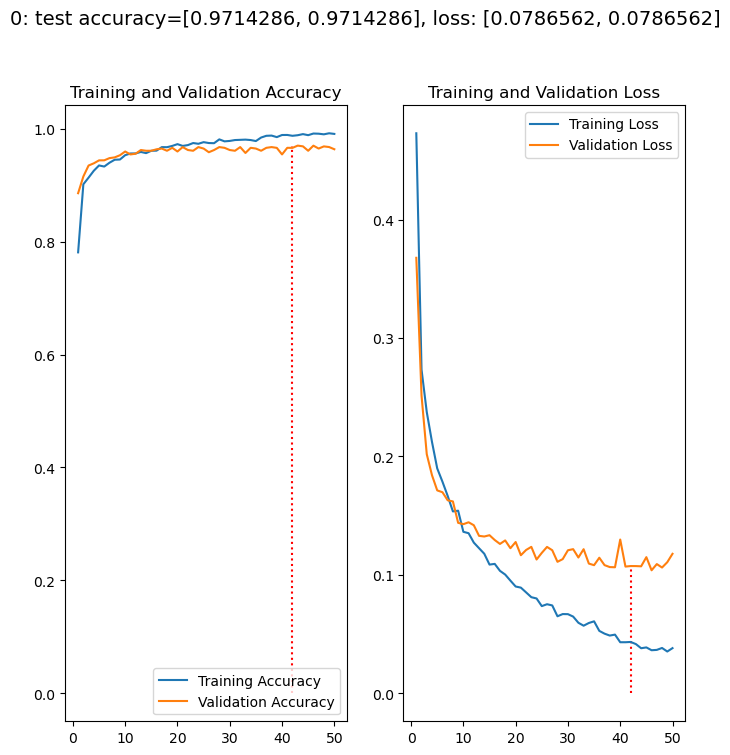

In [10]:
loss_regularized, acc_regularized = trainer_regularized.test()
# Uncomment trainer.plot_performance only if model was fully trained in current notebook-session
# because old plot is lost otherwise (because model.history isn't persisted across notebook sessions)
trainer_regularized.plot_performance("task4_model_regularized.png", group_no=2)

***
#### Q4: Compare the performance of the model with and without regularization. Where do you see improvements?


- While we manage to achieve better accuracy faster our model starts to overfit at some point (while our training loss keeps decreasing, the validation loss stays constant).

### 4 Data Augmentation
#### 4.1 Advanced Data Pre-Processing
You will enhance generalization of the network by artificially adding more variety to the training data. Implement data augmentation in **get_transforms** method of **my_datamodule**. Have a look at [torchvision transforms](https://pytorch.org/vision/stable/transforms.html) and choose at least three data augmentation techniques.

In [11]:
data_module_augmented = my_datamodule.DataModule(img_size=64, batch_size=64, augmented=True)

#### 4.2 Activation Maps before Training
Create a model with a dropout rate of **60%** and batch normalization. Use a learning rate of approximately **0.0007**. Call the model **'model_augmented'**.

The convolutional layers in the network are initialised with random values. We are going to compare the activation maps before and after the training process. Use ***utils.plot_activation_maps(..)*** to plot some untrained activation maps and filter kernels of the third model. 

Get two image sample of the augmented training dataset with **sample=dm2.train_dataset[...][0]**, one with a mask and one without a mask. Pass each image sample to ***utils.plot_activation_maps(..)***.


***Submission:*** Save the activation maps of the untrained model as **task4_face_activation_maps_before.png** and **task4_mask_activation_maps_before.png** using ***utils.plot_activation_maps(..)***



Total convolutional layers: 2
Total convolutional layers: 2


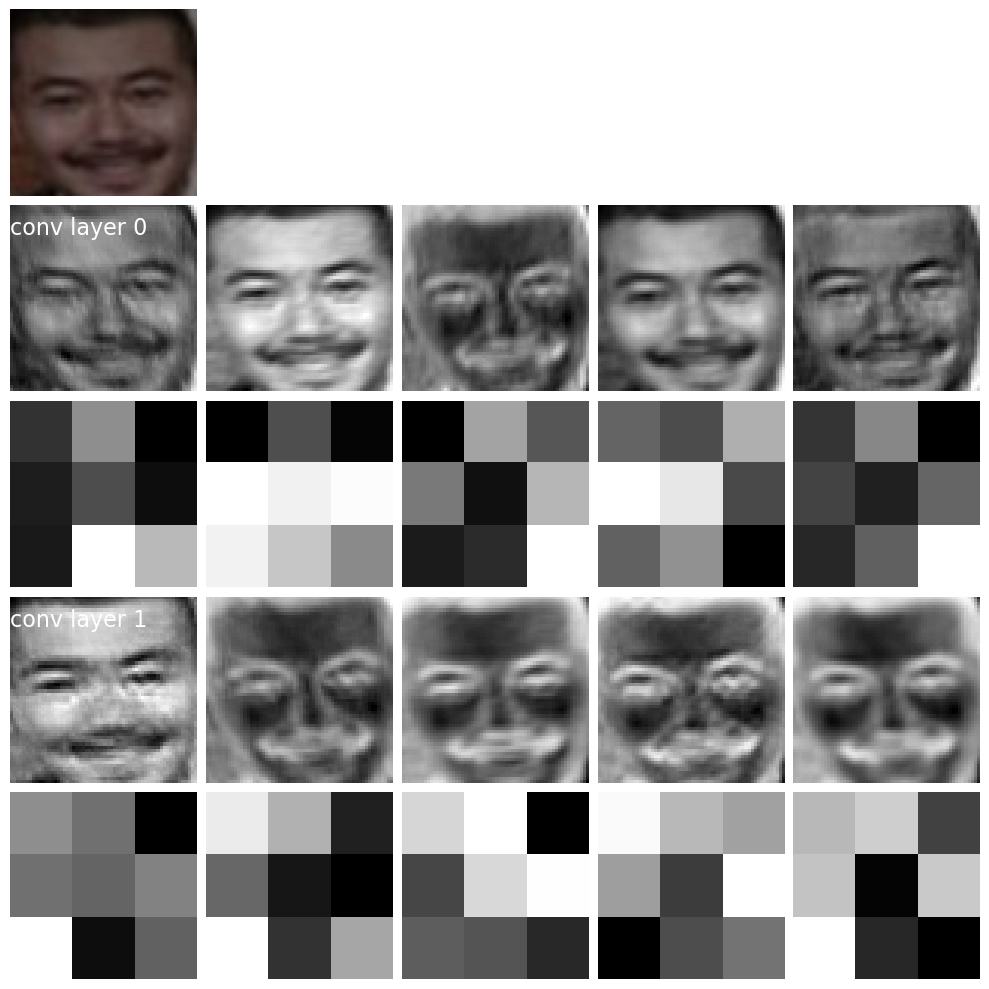

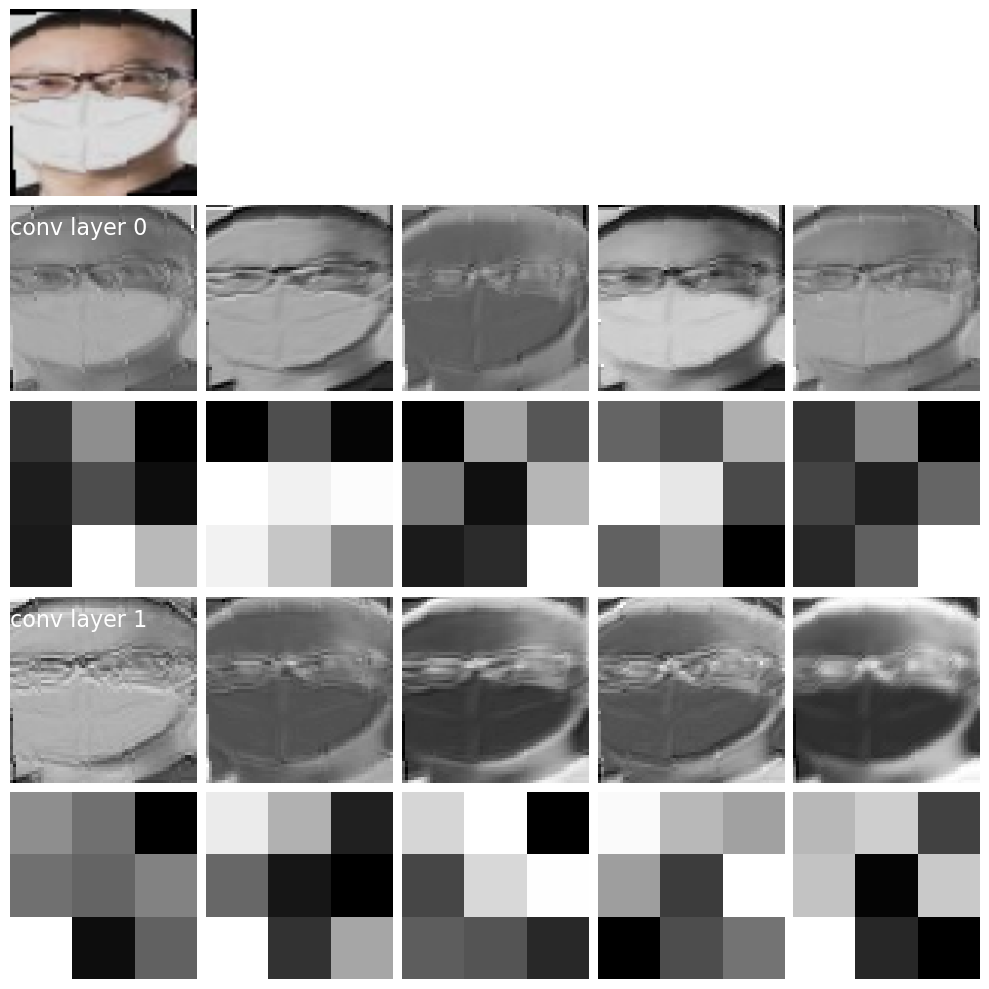

In [15]:
model_augmented = my_model.MaskClassifier(name="mask_classifier_augmented", img_size=64, dropout=0.6, batch_norm=True)

sample_face, sample_mask = data_module_augmented.train_dataset[0][0], data_module_augmented.train_dataset[2544][0]
utils.plot_activation_maps(model_augmented, sample_face, name="task4_mask_activation_maps_before.png", group_no=2)
utils.plot_activation_maps(model_augmented, sample_mask, name="task4_face_activation_maps_before.png", group_no=2)

#### 4.3 Training the network
Create a third trainer object and train the third network here using the augmented datamodule. Set the epochs to around **100**.

Depending on your hardware this might take longer than the last training sessions.

In [17]:
trainer_augmented = my_trainer.Trainer(model_augmented, data_module_augmented)

# Comment out trainer.load_model and uncomment trainer.fit to retrain model
#trainer_augmented.load_model()
trainer_augmented.fit(epochs=100, lr=0.0007)

Epoch 0: 100%|██████████████████████████████████| 42/42 [00:16<00:00,  2.52it/s]


Epoch 0 Training: Loss: 0.2720397710800171 Accuracy: 0.9007840752601624
Epoch 0 Validation: Loss: 0.21230126917362213 Accuracy: 0.9292535185813904


Epoch 1: 100%|██████████████████████████████████| 42/42 [00:16<00:00,  2.58it/s]


Epoch 1 Training: Loss: 0.21804410219192505 Accuracy: 0.9184695482254028
Epoch 1 Validation: Loss: 0.17165684700012207 Accuracy: 0.9345486164093018


Epoch 2: 100%|██████████████████████████████████| 42/42 [00:16<00:00,  2.56it/s]


Epoch 2 Training: Loss: 0.20416849851608276 Accuracy: 0.9288576245307922
Epoch 2 Validation: Loss: 0.17012538015842438 Accuracy: 0.9320312142372131


Epoch 3: 100%|██████████████████████████████████| 42/42 [00:16<00:00,  2.56it/s]


Epoch 3 Training: Loss: 0.18381886184215546 Accuracy: 0.9343807697296143
Epoch 3 Validation: Loss: 0.1982695311307907 Accuracy: 0.9361979365348816


Epoch 4: 100%|██████████████████████████████████| 42/42 [00:16<00:00,  2.60it/s]


Epoch 4 Training: Loss: 0.2116987556219101 Accuracy: 0.9233916997909546
Epoch 4 Validation: Loss: 0.20282846689224243 Accuracy: 0.9348958134651184


Epoch 5: 100%|██████████████████████████████████| 42/42 [00:16<00:00,  2.62it/s]


Epoch 5 Training: Loss: 0.18846282362937927 Accuracy: 0.9359546899795532
Epoch 5 Validation: Loss: 0.1559896618127823 Accuracy: 0.9439236521720886


Epoch 6: 100%|██████████████████████████████████| 42/42 [00:16<00:00,  2.56it/s]


Epoch 6 Training: Loss: 0.17136068642139435 Accuracy: 0.9372423887252808
Epoch 6 Validation: Loss: 0.19797755777835846 Accuracy: 0.9225694537162781


Epoch 7: 100%|██████████████████████████████████| 42/42 [00:16<00:00,  2.57it/s]


Epoch 7 Training: Loss: 0.18745151162147522 Accuracy: 0.9326064586639404
Epoch 7 Validation: Loss: 0.1421671360731125 Accuracy: 0.953038215637207


Epoch 8: 100%|██████████████████████████████████| 42/42 [00:16<00:00,  2.57it/s]


Epoch 8 Training: Loss: 0.16411998867988586 Accuracy: 0.9411343932151794
Epoch 8 Validation: Loss: 0.14390766620635986 Accuracy: 0.9557291865348816


Epoch 9: 100%|██████████████████████████████████| 42/42 [00:16<00:00,  2.54it/s]


Epoch 9 Training: Loss: 0.1497720628976822 Accuracy: 0.942450761795044
Epoch 9 Validation: Loss: 0.12487297505140305 Accuracy: 0.956944465637207


Epoch 10: 100%|█████████████████████████████████| 42/42 [00:16<00:00,  2.62it/s]


Epoch 10 Training: Loss: 0.14401982724666595 Accuracy: 0.951179027557373
Epoch 10 Validation: Loss: 0.17707042396068573 Accuracy: 0.945225715637207


Epoch 11: 100%|█████████████████████████████████| 42/42 [00:16<00:00,  2.60it/s]


Epoch 11 Training: Loss: 0.14348432421684265 Accuracy: 0.9489468932151794
Epoch 11 Validation: Loss: 0.12396726757287979 Accuracy: 0.9449653029441833


Epoch 12: 100%|█████████████████████████████████| 42/42 [00:16<00:00,  2.62it/s]


Epoch 12 Training: Loss: 0.15362423658370972 Accuracy: 0.9449690580368042
Epoch 12 Validation: Loss: 0.14398832619190216 Accuracy: 0.9486978650093079


Epoch 13: 100%|█████████████████████████████████| 42/42 [00:16<00:00,  2.51it/s]


Epoch 13 Training: Loss: 0.14541643857955933 Accuracy: 0.946743369102478
Epoch 13 Validation: Loss: 0.10548166185617447 Accuracy: 0.9595486521720886


Epoch 14: 100%|█████████████████████████████████| 42/42 [00:16<00:00,  2.58it/s]


Epoch 14 Training: Loss: 0.13026836514472961 Accuracy: 0.9557577967643738
Epoch 14 Validation: Loss: 0.12316638231277466 Accuracy: 0.9474826455116272


Epoch 15: 100%|█████████████████████████████████| 42/42 [00:16<00:00,  2.61it/s]


Epoch 15 Training: Loss: 0.1488618105649948 Accuracy: 0.9435667991638184
Epoch 15 Validation: Loss: 0.23363815248012543 Accuracy: 0.90625


Epoch 16: 100%|█████████████████████████████████| 42/42 [00:16<00:00,  2.60it/s]


Epoch 16 Training: Loss: 0.14328572154045105 Accuracy: 0.9447687864303589
Epoch 16 Validation: Loss: 0.10959941148757935 Accuracy: 0.9578993320465088


Epoch 17: 100%|█████████████████████████████████| 42/42 [00:16<00:00,  2.54it/s]


Epoch 17 Training: Loss: 0.13273899257183075 Accuracy: 0.950835645198822
Epoch 17 Validation: Loss: 0.1250184029340744 Accuracy: 0.9555554986000061


Epoch 18: 100%|█████████████████████████████████| 42/42 [00:16<00:00,  2.58it/s]


Epoch 18 Training: Loss: 0.13587279617786407 Accuracy: 0.9524953961372375
Epoch 18 Validation: Loss: 0.10829481482505798 Accuracy: 0.9568576216697693


Epoch 19: 100%|█████████████████████████████████| 42/42 [00:16<00:00,  2.61it/s]


Epoch 19 Training: Loss: 0.12338326126337051 Accuracy: 0.9541552662849426
Epoch 19 Validation: Loss: 0.09928090125322342 Accuracy: 0.9661458134651184


Epoch 20: 100%|█████████████████████████████████| 42/42 [00:16<00:00,  2.55it/s]


Epoch 20 Training: Loss: 0.1253548413515091 Accuracy: 0.9520089030265808
Epoch 20 Validation: Loss: 0.10453540086746216 Accuracy: 0.9593749642372131


Epoch 21: 100%|█████████████████████████████████| 42/42 [00:16<00:00,  2.60it/s]


Epoch 21 Training: Loss: 0.1263311803340912 Accuracy: 0.9516369104385376
Epoch 21 Validation: Loss: 0.10867588967084885 Accuracy: 0.9595486521720886


Epoch 22: 100%|█████████████████████████████████| 42/42 [00:16<00:00,  2.58it/s]


Epoch 22 Training: Loss: 0.10877759009599686 Accuracy: 0.9598214030265808
Epoch 22 Validation: Loss: 0.09927334636449814 Accuracy: 0.9660590291023254


Epoch 23: 100%|█████████████████████████████████| 42/42 [00:16<00:00,  2.57it/s]


Epoch 23 Training: Loss: 0.11594203859567642 Accuracy: 0.9550137519836426
Epoch 23 Validation: Loss: 0.08782009035348892 Accuracy: 0.9724826216697693


Epoch 24: 100%|█████████████████████████████████| 42/42 [00:16<00:00,  2.62it/s]


Epoch 24 Training: Loss: 0.12382632493972778 Accuracy: 0.9507212042808533
Epoch 24 Validation: Loss: 0.11853200942277908 Accuracy: 0.9556424021720886


Epoch 25: 100%|█████████████████████████████████| 42/42 [00:16<00:00,  2.59it/s]


Epoch 25 Training: Loss: 0.13230539858341217 Accuracy: 0.9535256624221802
Epoch 25 Validation: Loss: 0.10344913601875305 Accuracy: 0.9557291865348816


Epoch 26: 100%|█████████████████████████████████| 42/42 [00:16<00:00,  2.62it/s]


Epoch 26 Training: Loss: 0.11851707100868225 Accuracy: 0.9539834856987
Epoch 26 Validation: Loss: 0.10174640268087387 Accuracy: 0.9660590291023254


Epoch 27: 100%|█████████████████████████████████| 42/42 [00:16<00:00,  2.54it/s]


Epoch 27 Training: Loss: 0.10272569954395294 Accuracy: 0.9644860625267029
Epoch 27 Validation: Loss: 0.42594608664512634 Accuracy: 0.8762152791023254


Epoch 28: 100%|█████████████████████████████████| 42/42 [00:16<00:00,  2.55it/s]


Epoch 28 Training: Loss: 0.1213526502251625 Accuracy: 0.9568738341331482
Epoch 28 Validation: Loss: 0.12423374503850937 Accuracy: 0.9596354365348816


Epoch 29: 100%|█████████████████████████████████| 42/42 [00:15<00:00,  2.70it/s]


Epoch 29 Training: Loss: 0.11237471550703049 Accuracy: 0.9557577967643738
Epoch 29 Validation: Loss: 0.09151273220777512 Accuracy: 0.9661458134651184


Epoch 30: 100%|█████████████████████████████████| 42/42 [00:15<00:00,  2.73it/s]


Epoch 30 Training: Loss: 0.12398935854434967 Accuracy: 0.9551854729652405
Epoch 30 Validation: Loss: 0.19129543006420135 Accuracy: 0.9348090291023254


Epoch 31: 100%|█████████████████████████████████| 42/42 [00:16<00:00,  2.59it/s]


Epoch 31 Training: Loss: 0.11873158812522888 Accuracy: 0.955271303653717
Epoch 31 Validation: Loss: 0.08715382218360901 Accuracy: 0.9710937142372131


Epoch 32: 100%|█████████████████████████████████| 42/42 [00:16<00:00,  2.58it/s]


Epoch 32 Training: Loss: 0.1087735965847969 Accuracy: 0.9560153484344482
Epoch 32 Validation: Loss: 0.11623301357030869 Accuracy: 0.9595486521720886


Epoch 33: 100%|█████████████████████████████████| 42/42 [00:16<00:00,  2.55it/s]


Epoch 33 Training: Loss: 0.10562501847743988 Accuracy: 0.959363579750061
Epoch 33 Validation: Loss: 0.08077146857976913 Accuracy: 0.96875


Epoch 34: 100%|█████████████████████████████████| 42/42 [00:16<00:00,  2.55it/s]


Epoch 34 Training: Loss: 0.11454807221889496 Accuracy: 0.9591059684753418
Epoch 34 Validation: Loss: 0.09301728010177612 Accuracy: 0.9712674021720886


Epoch 35: 100%|█████████████████████████████████| 42/42 [00:15<00:00,  2.63it/s]


Epoch 35 Training: Loss: 0.10955683141946793 Accuracy: 0.9591917991638184
Epoch 35 Validation: Loss: 0.08785004168748856 Accuracy: 0.96875


Epoch 36: 100%|█████████████████████████████████| 42/42 [00:16<00:00,  2.60it/s]


Epoch 36 Training: Loss: 0.10160122811794281 Accuracy: 0.9607658386230469
Epoch 36 Validation: Loss: 0.12437472492456436 Accuracy: 0.960850715637207


Epoch 37: 100%|█████████████████████████████████| 42/42 [00:15<00:00,  2.71it/s]


Epoch 37 Training: Loss: 0.10054421424865723 Accuracy: 0.963942289352417
Epoch 37 Validation: Loss: 0.17467248439788818 Accuracy: 0.953125


Epoch 38: 100%|█████████████████████████████████| 42/42 [00:15<00:00,  2.75it/s]


Epoch 38 Training: Loss: 0.10696584731340408 Accuracy: 0.9590201377868652
Epoch 38 Validation: Loss: 0.12127508968114853 Accuracy: 0.9661458134651184


Epoch 39: 100%|█████████████████████████████████| 42/42 [00:15<00:00,  2.70it/s]


Epoch 39 Training: Loss: 0.09500238299369812 Accuracy: 0.9665178656578064
Epoch 39 Validation: Loss: 0.14609044790267944 Accuracy: 0.9394097328186035


Epoch 40: 100%|█████████████████████████████████| 42/42 [00:15<00:00,  2.69it/s]


Epoch 40 Training: Loss: 0.10644802451133728 Accuracy: 0.9607658386230469
Epoch 40 Validation: Loss: 0.09130126237869263 Accuracy: 0.96875


Epoch 41: 100%|█████████████████████████████████| 42/42 [00:15<00:00,  2.72it/s]


Epoch 41 Training: Loss: 0.09634902328252792 Accuracy: 0.9641140699386597
Epoch 41 Validation: Loss: 0.12542308866977692 Accuracy: 0.9432291984558105


Epoch 42: 100%|█████████████████████████████████| 42/42 [00:15<00:00,  2.78it/s]


Epoch 42 Training: Loss: 0.09217854589223862 Accuracy: 0.9640281200408936
Epoch 42 Validation: Loss: 0.1023971438407898 Accuracy: 0.9660590291023254


Epoch 43: 100%|█████████████████████████████████| 42/42 [00:15<00:00,  2.67it/s]


Epoch 43 Training: Loss: 0.08759239315986633 Accuracy: 0.9679201245307922
Epoch 43 Validation: Loss: 0.07141571491956711 Accuracy: 0.972569465637207


Epoch 44: 100%|█████████████████████████████████| 42/42 [00:15<00:00,  2.69it/s]


Epoch 44 Training: Loss: 0.08975417166948318 Accuracy: 0.9654017686843872
Epoch 44 Validation: Loss: 0.11101395636796951 Accuracy: 0.9635416865348816


Epoch 45: 100%|█████████████████████████████████| 42/42 [00:16<00:00,  2.60it/s]


Epoch 45 Training: Loss: 0.11391513794660568 Accuracy: 0.9561011791229248
Epoch 45 Validation: Loss: 0.08059221506118774 Accuracy: 0.9752604365348816


Epoch 46: 100%|█████████████████████████████████| 42/42 [00:15<00:00,  2.70it/s]


Epoch 46 Training: Loss: 0.09421053528785706 Accuracy: 0.9617101550102234
Epoch 46 Validation: Loss: 0.1325705498456955 Accuracy: 0.953125


Epoch 47: 100%|█████████████████████████████████| 42/42 [00:15<00:00,  2.65it/s]


Epoch 47 Training: Loss: 0.10213162750005722 Accuracy: 0.9609661102294922
Epoch 47 Validation: Loss: 0.09294822067022324 Accuracy: 0.96875


Epoch 48: 100%|█████████████████████████████████| 42/42 [00:16<00:00,  2.61it/s]


Epoch 48 Training: Loss: 0.09035980701446533 Accuracy: 0.9661458134651184
Epoch 48 Validation: Loss: 0.07864456623792648 Accuracy: 0.9698784351348877


Epoch 49: 100%|█████████████████████████████████| 42/42 [00:16<00:00,  2.57it/s]


Epoch 49 Training: Loss: 0.08148890733718872 Accuracy: 0.9670042991638184
Epoch 49 Validation: Loss: 0.06912229210138321 Accuracy: 0.9790799021720886


Epoch 50: 100%|█████████████████████████████████| 42/42 [00:16<00:00,  2.62it/s]


Epoch 50 Training: Loss: 0.08341499418020248 Accuracy: 0.9682921171188354
Epoch 50 Validation: Loss: 0.0982590988278389 Accuracy: 0.9618923664093018


Epoch 51: 100%|█████████████████████████████████| 42/42 [00:16<00:00,  2.59it/s]


Epoch 51 Training: Loss: 0.10067273676395416 Accuracy: 0.963083803653717
Epoch 51 Validation: Loss: 0.10116694122552872 Accuracy: 0.9685763716697693


Epoch 52: 100%|█████████████████████████████████| 42/42 [00:15<00:00,  2.69it/s]


Epoch 52 Training: Loss: 0.09589403867721558 Accuracy: 0.9639136791229248
Epoch 52 Validation: Loss: 0.08948156982660294 Accuracy: 0.9738715291023254


Epoch 53: 100%|█████████████████████████████████| 42/42 [00:15<00:00,  2.66it/s]


Epoch 53 Training: Loss: 0.08911053091287613 Accuracy: 0.9693223834037781
Epoch 53 Validation: Loss: 0.10196884721517563 Accuracy: 0.9713541865348816


Epoch 54: 100%|█████████████████████████████████| 42/42 [00:15<00:00,  2.66it/s]


Epoch 54 Training: Loss: 0.08934618532657623 Accuracy: 0.9701522588729858
Epoch 54 Validation: Loss: 0.06997436285018921 Accuracy: 0.98046875


Epoch 55: 100%|█████████████████████████████████| 42/42 [00:15<00:00,  2.70it/s]


Epoch 55 Training: Loss: 0.091067373752594 Accuracy: 0.963083803653717
Epoch 55 Validation: Loss: 0.08627688884735107 Accuracy: 0.9685763716697693


Epoch 56: 100%|█████████████████████████████████| 42/42 [00:15<00:00,  2.66it/s]


Epoch 56 Training: Loss: 0.0892014354467392 Accuracy: 0.9644860625267029
Epoch 56 Validation: Loss: 0.12526267766952515 Accuracy: 0.9582465291023254


Epoch 57: 100%|█████████████████████████████████| 42/42 [00:16<00:00,  2.62it/s]


Epoch 57 Training: Loss: 0.09390208125114441 Accuracy: 0.964314341545105
Epoch 57 Validation: Loss: 0.09806831926107407 Accuracy: 0.9671874642372131


Epoch 58: 100%|█████████████████████████████████| 42/42 [00:16<00:00,  2.62it/s]


Epoch 58 Training: Loss: 0.09213902801275253 Accuracy: 0.9653159379959106
Epoch 58 Validation: Loss: 0.07425632327795029 Accuracy: 0.97265625


Epoch 59: 100%|█████████████████████████████████| 42/42 [00:16<00:00,  2.60it/s]


Epoch 59 Training: Loss: 0.09477891027927399 Accuracy: 0.9670042991638184
Epoch 59 Validation: Loss: 0.10147443413734436 Accuracy: 0.9671874642372131


Epoch 60: 100%|█████████████████████████████████| 42/42 [00:16<00:00,  2.62it/s]


Epoch 60 Training: Loss: 0.09261904656887054 Accuracy: 0.9676339030265808
Epoch 60 Validation: Loss: 0.09195690602064133 Accuracy: 0.97265625


Epoch 61: 100%|█████████████████████████████████| 42/42 [00:15<00:00,  2.63it/s]


Epoch 61 Training: Loss: 0.08379027992486954 Accuracy: 0.9672619104385376
Epoch 61 Validation: Loss: 0.09082552790641785 Accuracy: 0.9685763716697693


Epoch 62: 100%|█████████████████████████████████| 42/42 [00:16<00:00,  2.57it/s]


Epoch 62 Training: Loss: 0.08915819227695465 Accuracy: 0.9644860625267029
Epoch 62 Validation: Loss: 0.10735925287008286 Accuracy: 0.9607638716697693


Epoch 63: 100%|█████████████████████████████████| 42/42 [00:15<00:00,  2.68it/s]


Epoch 63 Training: Loss: 0.08353747427463531 Accuracy: 0.970896303653717
Epoch 63 Validation: Loss: 0.09254678338766098 Accuracy: 0.9699652791023254


Epoch 64: 100%|█████████████████████████████████| 42/42 [00:15<00:00,  2.64it/s]


Epoch 64 Training: Loss: 0.08260492235422134 Accuracy: 0.9696084856987
Epoch 64 Validation: Loss: 0.10216408967971802 Accuracy: 0.9605903029441833


Epoch 65: 100%|█████████████████████████████████| 42/42 [00:15<00:00,  2.64it/s]


Epoch 65 Training: Loss: 0.08282090723514557 Accuracy: 0.9703525304794312
Epoch 65 Validation: Loss: 0.10382934659719467 Accuracy: 0.9672742486000061


Epoch 66: 100%|█████████████████████████████████| 42/42 [00:16<00:00,  2.58it/s]


Epoch 66 Training: Loss: 0.09250877797603607 Accuracy: 0.9651442170143127
Epoch 66 Validation: Loss: 0.08924322575330734 Accuracy: 0.9660590291023254


Epoch 67: 100%|█████████████████████████████████| 42/42 [00:15<00:00,  2.63it/s]


Epoch 67 Training: Loss: 0.08529263734817505 Accuracy: 0.9693223834037781
Epoch 67 Validation: Loss: 0.1313040852546692 Accuracy: 0.9582465291023254


Epoch 68: 100%|█████████████████████████████████| 42/42 [00:15<00:00,  2.65it/s]


Epoch 68 Training: Loss: 0.09282801300287247 Accuracy: 0.9624541997909546
Epoch 68 Validation: Loss: 0.07748977094888687 Accuracy: 0.9752604365348816


Epoch 69: 100%|█████████████████████████████████| 42/42 [00:16<00:00,  2.52it/s]


Epoch 69 Training: Loss: 0.08322080224752426 Accuracy: 0.9682062864303589
Epoch 69 Validation: Loss: 0.09059205651283264 Accuracy: 0.9724826216697693


Epoch 70: 100%|█████████████████████████████████| 42/42 [00:15<00:00,  2.64it/s]


Epoch 70 Training: Loss: 0.07846400886774063 Accuracy: 0.9704384803771973
Epoch 70 Validation: Loss: 0.0895218625664711 Accuracy: 0.9659721851348877


Epoch 71: 100%|█████████████████████████████████| 42/42 [00:16<00:00,  2.60it/s]


Epoch 71 Training: Loss: 0.08235006779432297 Accuracy: 0.9710107445716858
Epoch 71 Validation: Loss: 0.08976989984512329 Accuracy: 0.9700520634651184


Epoch 72: 100%|█████████████████████████████████| 42/42 [00:17<00:00,  2.46it/s]


Epoch 72 Training: Loss: 0.06939239054918289 Accuracy: 0.9761046171188354
Epoch 72 Validation: Loss: 0.09010543674230576 Accuracy: 0.9765625


Epoch 73: 100%|█████████████████████████████████| 42/42 [00:16<00:00,  2.61it/s]


Epoch 73 Training: Loss: 0.07330530881881714 Accuracy: 0.9741587042808533
Epoch 73 Validation: Loss: 0.08260753750801086 Accuracy: 0.972569465637207


Epoch 74: 100%|█████████████████████████████████| 42/42 [00:16<00:00,  2.54it/s]


Epoch 74 Training: Loss: 0.0768478512763977 Accuracy: 0.9722985625267029
Epoch 74 Validation: Loss: 0.11086013913154602 Accuracy: 0.9700520634651184


Epoch 75: 100%|█████████████████████████████████| 42/42 [00:16<00:00,  2.59it/s]


Epoch 75 Training: Loss: 0.08341136574745178 Accuracy: 0.967176079750061
Epoch 75 Validation: Loss: 0.09198585897684097 Accuracy: 0.9723958373069763


Epoch 76: 100%|█████████████████████████████████| 42/42 [00:16<00:00,  2.57it/s]


Epoch 76 Training: Loss: 0.07711604982614517 Accuracy: 0.9682062864303589
Epoch 76 Validation: Loss: 0.08516225963830948 Accuracy: 0.972569465637207


Epoch 77: 100%|█████████████████████████████████| 42/42 [00:15<00:00,  2.63it/s]


Epoch 77 Training: Loss: 0.06864937394857407 Accuracy: 0.970896303653717
Epoch 77 Validation: Loss: 0.1332099437713623 Accuracy: 0.9596354365348816


Epoch 78: 100%|█████████████████████████████████| 42/42 [00:16<00:00,  2.59it/s]


Epoch 78 Training: Loss: 0.06628314405679703 Accuracy: 0.9758184552192688
Epoch 78 Validation: Loss: 0.0944744423031807 Accuracy: 0.9661458134651184


Epoch 79: 100%|█████████████████████████████████| 42/42 [00:16<00:00,  2.52it/s]


Epoch 79 Training: Loss: 0.07234500348567963 Accuracy: 0.9720124006271362
Epoch 79 Validation: Loss: 0.10829690843820572 Accuracy: 0.9620659351348877


Epoch 80: 100%|█████████████████████████████████| 42/42 [00:16<00:00,  2.53it/s]


Epoch 80 Training: Loss: 0.08377430588006973 Accuracy: 0.966804027557373
Epoch 80 Validation: Loss: 0.10791780799627304 Accuracy: 0.96484375


Epoch 81: 100%|█████████████████████████████████| 42/42 [00:15<00:00,  2.67it/s]


Epoch 81 Training: Loss: 0.07804988324642181 Accuracy: 0.9708104729652405
Epoch 81 Validation: Loss: 0.16982096433639526 Accuracy: 0.9427083134651184


Epoch 82: 100%|█████████████████████████████████| 42/42 [00:15<00:00,  2.69it/s]


Epoch 82 Training: Loss: 0.08066289871931076 Accuracy: 0.9709821343421936
Epoch 82 Validation: Loss: 0.10018227249383926 Accuracy: 0.96875


Epoch 83: 100%|█████████████████████████████████| 42/42 [00:15<00:00,  2.67it/s]


Epoch 83 Training: Loss: 0.079110287129879 Accuracy: 0.9716689586639404
Epoch 83 Validation: Loss: 0.07702919095754623 Accuracy: 0.9778645634651184


Epoch 84: 100%|█████████████████████████████████| 42/42 [00:16<00:00,  2.60it/s]


Epoch 84 Training: Loss: 0.07012510299682617 Accuracy: 0.9692364931106567
Epoch 84 Validation: Loss: 0.06740190088748932 Accuracy: 0.9751736521720886


Epoch 85: 100%|█████████████████████████████████| 42/42 [00:16<00:00,  2.54it/s]


Epoch 85 Training: Loss: 0.08669260889291763 Accuracy: 0.9665178656578064
Epoch 85 Validation: Loss: 0.12624846398830414 Accuracy: 0.96484375


Epoch 86: 100%|█████████████████████████████████| 42/42 [00:16<00:00,  2.59it/s]


Epoch 86 Training: Loss: 0.07210484147071838 Accuracy: 0.9716403484344482
Epoch 86 Validation: Loss: 0.06717467308044434 Accuracy: 0.9750867486000061


Epoch 87: 100%|█████████████████████████████████| 42/42 [00:16<00:00,  2.58it/s]


Epoch 87 Training: Loss: 0.06746215373277664 Accuracy: 0.9764766693115234
Epoch 87 Validation: Loss: 0.0872434750199318 Accuracy: 0.9711804986000061


Epoch 88: 100%|█████████████████████████████████| 42/42 [00:16<00:00,  2.59it/s]


Epoch 88 Training: Loss: 0.0719505324959755 Accuracy: 0.974988579750061
Epoch 88 Validation: Loss: 0.07252749800682068 Accuracy: 0.9751736521720886


Epoch 89: 100%|█████████████████████████████████| 42/42 [00:16<00:00,  2.59it/s]


Epoch 89 Training: Loss: 0.07270952314138412 Accuracy: 0.9740727543830872
Epoch 89 Validation: Loss: 0.07888952642679214 Accuracy: 0.98046875


Epoch 90: 100%|█████████████████████████████████| 42/42 [00:15<00:00,  2.64it/s]


Epoch 90 Training: Loss: 0.07384473830461502 Accuracy: 0.9735004901885986
Epoch 90 Validation: Loss: 0.08153270930051804 Accuracy: 0.976475715637207


Epoch 91: 100%|█████████████████████████████████| 42/42 [00:15<00:00,  2.67it/s]


Epoch 91 Training: Loss: 0.06440013647079468 Accuracy: 0.9749027490615845
Epoch 91 Validation: Loss: 0.07081147283315659 Accuracy: 0.98046875


Epoch 92: 100%|█████████████████████████████████| 42/42 [00:16<00:00,  2.61it/s]


Epoch 92 Training: Loss: 0.05811329185962677 Accuracy: 0.976934552192688
Epoch 92 Validation: Loss: 0.06075241044163704 Accuracy: 0.98046875


Epoch 93: 100%|█████████████████████████████████| 42/42 [00:16<00:00,  2.61it/s]


Epoch 93 Training: Loss: 0.06619445234537125 Accuracy: 0.9785370826721191
Epoch 93 Validation: Loss: 0.06805561482906342 Accuracy: 0.976475715637207


Epoch 94: 100%|█████████████████████████████████| 42/42 [00:15<00:00,  2.63it/s]


Epoch 94 Training: Loss: 0.07079300284385681 Accuracy: 0.9732142686843872
Epoch 94 Validation: Loss: 0.1649060696363449 Accuracy: 0.9505208134651184


Epoch 95: 100%|█████████████████████████████████| 42/42 [00:16<00:00,  2.62it/s]


Epoch 95 Training: Loss: 0.06414421647787094 Accuracy: 0.9735863208770752
Epoch 95 Validation: Loss: 0.10898671299219131 Accuracy: 0.9621527791023254


Epoch 96: 100%|█████████████████████████████████| 42/42 [00:15<00:00,  2.70it/s]


Epoch 96 Training: Loss: 0.05769095569849014 Accuracy: 0.9783368110656738
Epoch 96 Validation: Loss: 0.12980233132839203 Accuracy: 0.9595486521720886


Epoch 97: 100%|█████████████████████████████████| 42/42 [00:15<00:00,  2.66it/s]


Epoch 97 Training: Loss: 0.08232821524143219 Accuracy: 0.9685783386230469
Epoch 97 Validation: Loss: 0.15464283525943756 Accuracy: 0.9543402791023254


Epoch 98: 100%|█████████████████████████████████| 42/42 [00:15<00:00,  2.66it/s]


Epoch 98 Training: Loss: 0.07000855356454849 Accuracy: 0.9735863208770752
Epoch 98 Validation: Loss: 0.0870242491364479 Accuracy: 0.96875


Epoch 99: 100%|█████████████████████████████████| 42/42 [00:15<00:00,  2.67it/s]


Epoch 99 Training: Loss: 0.07855965197086334 Accuracy: 0.9710107445716858
Epoch 99 Validation: Loss: 0.11131345480680466 Accuracy: 0.9633679986000061


#### 4.4. Performance Evaluation 
Plot the model performance of the third model with ***trainer3.plot_performance(..)***.


***Submission:*** Save the output of ***model.plot_curve(..)*** as **task4_model_augmented.png**

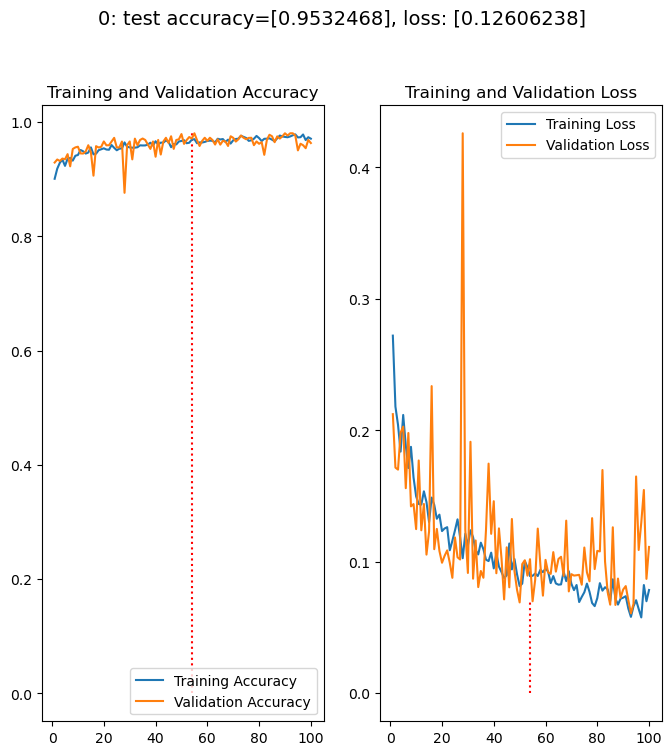

In [18]:
loss_augmented, acc_augmented = trainer_simple.test()
# Uncomment trainer.plot_performance only if model was fully trained in current notebook-session
# because old plot is lost otherwise (because model.history isn't persisted across notebook sessions)
trainer_augmented.plot_performance()

# What is meant by "model.plot_curve(..)"?

***
#### Q5: Look at the performance of the third model over time, what do you observe compared to the first two models? Explain underfitting/overfitting based on your plots.

We see very varying validation loss, probably because our augmentation is too strong. In general we see less overfitting than in the prior models graph. Maybe training more epochs with slightly less augmentation would yield better results. 

#### 4.5 Activation Maps after Training
During training the weights of the model are adapted to the feature distribution of the training dataset. Plot some activation maps of the third model again using ***utils.plot_activation_maps(..)***. Use the same image samples you used before.

***Submission:*** Save the activation maps after the training as **task4_mask_activation_maps_after.png** and **task4_face_activation_maps_after.png** using ***utils.plot_activation_maps(..)***

Total convolutional layers: 2
Total convolutional layers: 2


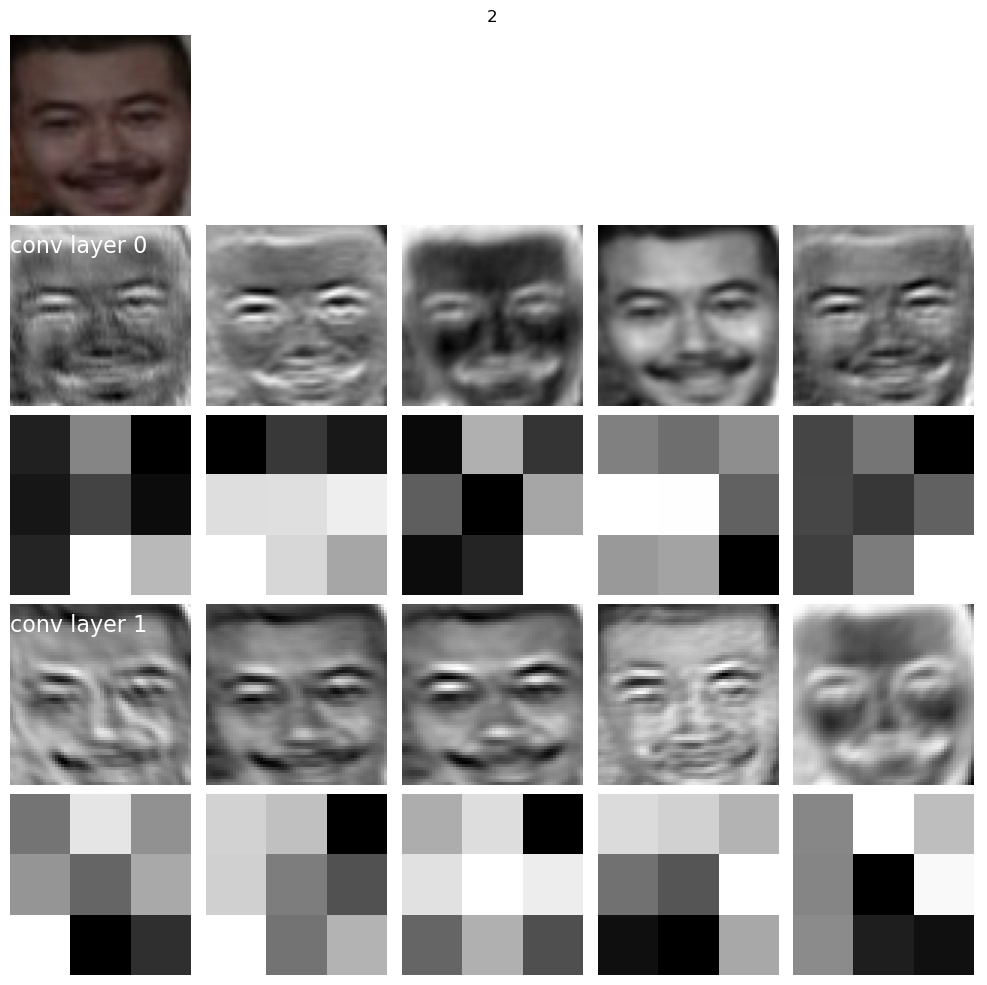

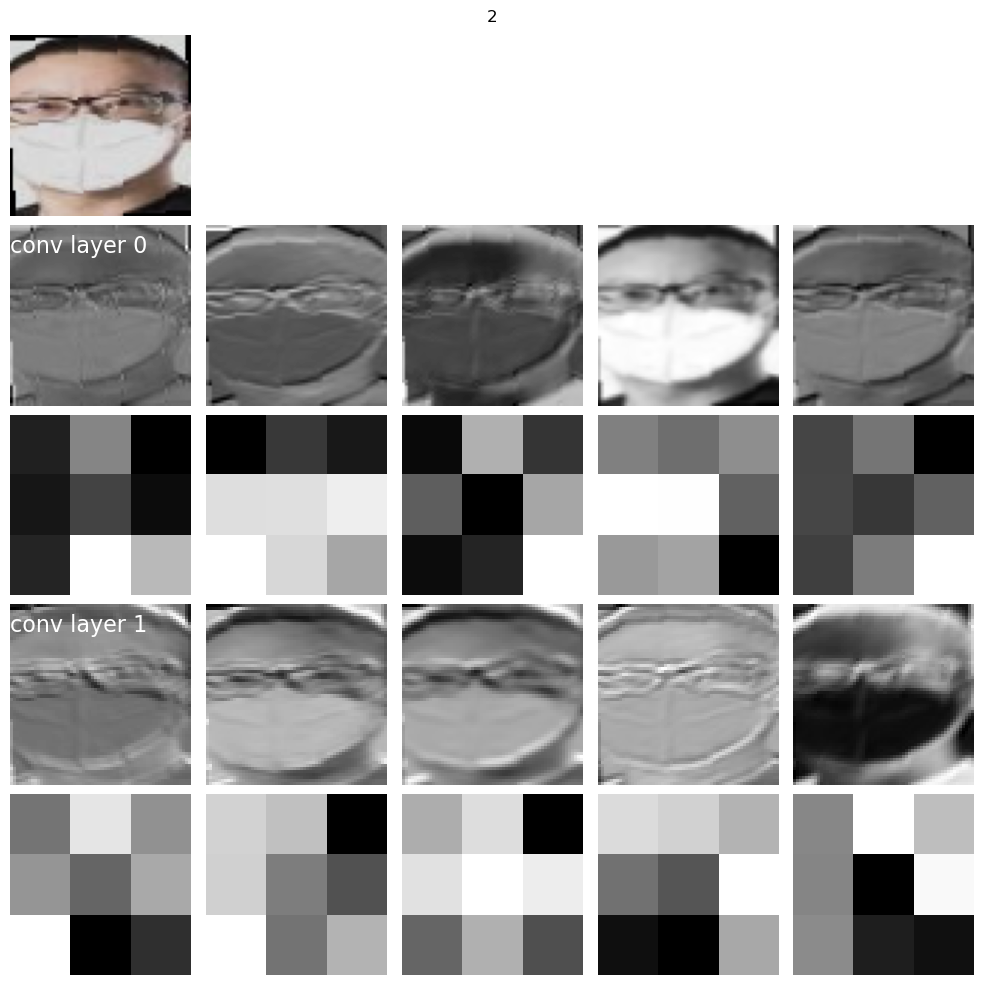

In [19]:
utils.plot_activation_maps(model_augmented, sample_face, name="task4_mask_activation_maps_after.png", group_no=2)
utils.plot_activation_maps(model_augmented, sample_mask, name="task4_face_activation_maps_after.png", group_no=2)

***
#### Q6: The activations and filter kernels after the training have changed, what do you observe? Explain possible reasons.


We observe that contrast in the activation maps and kernels is increased, this would imply that each kernel channel is becoming more specialized to identify a certain feature.

### 5 Evaluation

Calculate the confusion matrix. You can use the function **confusion_matrix** from **sklearn.metrics**. A confusion matrix within a binary decision problem shows:
 - "true positive" for correctly predicted event values.
 - "false positive" for incorrectly predicted event values.
 - "true negative" for correctly predicted no-event values.
 - "false negative" for incorrectly predicted no-event values.

You can obtain the test data and labes by using **X, y = next(iter(dm2.text_dataloader()))**. Use **trainer3.predict(X)** to obtain the predicted value. You can convert a tensor to a numpy array by using **y.detach().numpy()**. 

In [1]:
import sklearn.metrics
X, y = next(iter(data_module_augmented.test_dataloader()))
predictions_augmented = trainer_augmented.predict(X)
confusion_matrix_augmented = sklearn.metrics.confusion_matrix(y, predictions_augmented)
print("For {} samples we get (1st row: tn, fp; 2nd row: fn, tn):".format(len(y)))
print(confusion_matrix_augmented)

'''
Below print lost currently: 
Old print was:

For 385 samples we get (1st row: tn, fp; 2nd row: fn, tn):
[[188   5]
 [ 13 179]]
'''

NameError: name 'data_module_augmented' is not defined

***
#### Q7: Compare the approach for classification from TASK3 and TASK4. Discuss advantages, disadvantages, strength and weakness. 


- Classical CV-methods (feature extraction, visual words by finding cluster-centers (bag of words), matching word-histograms for classification) VS. learning-based approach (learning to extract features which match a classification). Finding the cluster centers with k-means is unsupervised. The neural network can rely on the feedback obtained by the annotated test set.